<a href="https://colab.research.google.com/github/kateh321/Mathproject/blob/main/Math_model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import random
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
################################################################################
import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
################################################################################
from keras import layers,utils
from keras.datasets import cifar100
from keras.models import Sequential,load_model
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, Activation, Flatten,Conv2D,MaxPooling2D, MaxPool2D,Add, concatenate
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import BatchNormalization

################################################################################

In [2]:
#Pull dataset from mendeley
!wget -O PBC_dataset_normal_DIB.zip https://data.mendeley.com/public-files/datasets/snkd93bnjr/files/2fc38728-2ae7-4a62-a857-032af82334c3/file_downloaded

--2022-05-01 23:25:54--  https://data.mendeley.com/public-files/datasets/snkd93bnjr/files/2fc38728-2ae7-4a62-a857-032af82334c3/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/5a5a3b1a-0b1d-46bc-bff2-0420599d351b [following]
--2022-05-01 23:25:54--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/5a5a3b1a-0b1d-46bc-bff2-0420599d351b
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.56.56
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.218.56.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 281366219 (268M) [application

In [3]:
#Unzip dataset
!unzip "/content/PBC_dataset_normal_DIB.zip" 

Streaming output truncated to the last 5000 lines.
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_292483.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_935950.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_890863.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_519370.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_215077.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_388154.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_968896.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_34345.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_349907.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_245683.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_785122.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_615525.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_714613.jpg  
  inflating: PBC_dataset_normal_DIB/erythroblast/ERB_904757.jpg  
  inflating: PBC_dataset_n

In [4]:
#This module not available in collab, must be installed
!pip install split-folders

In [5]:
#Split dataset into 3 folders - train, validation and test
import splitfolders
#Split data into train/val/test
splitfolders.ratio('PBC_dataset_normal_DIB', output="PBC_dataset_normal_DIB_pre", seed=777, ratio=(.70, .15, .15)) 

Copying files: 17092 files [00:02, 8105.09 files/s]


In [6]:
#paths for folders
data_path = 'PBC_dataset_normal_DIB_pre'
print("The Folders in Data Directory is:  ",os.listdir(data_path))

The Folders in Data Directory is:   ['train', 'test', 'val']


In [7]:
#Show number and name of classes in dataset
classes = os.listdir(data_path + "/train")
print(classes)
print("Classes Length: ",len(classes))

['erythroblast', 'basophil', 'lymphocyte', 'neutrophil', 'eosinophil', 'platelet', 'ig', 'monocyte']
Classes Length:  8


In [8]:
#Data Augmentation 
train_datagen = ImageDataGenerator(horizontal_flip=True, 
                                   vertical_flip=True,
                                   rotation_range=90
                                   )
val_datagen   = ImageDataGenerator()

train_dataset = train_datagen.flow_from_directory(
    '/content/PBC_dataset_normal_DIB_pre/train',
    seed=777,
    target_size=(128,128),
    batch_size=64,
    shuffle=True,
    class_mode = 'categorical')

val_dataset = val_datagen.flow_from_directory(
    '/content/PBC_dataset_normal_DIB_pre/val',
    seed=777,
    target_size=(128,128),
    batch_size=64,
    shuffle=True,
    class_mode = 'categorical')

Found 11959 images belonging to 8 classes.
Found 2561 images belonging to 8 classes.


In [9]:
#Assigning Lambda value for regularizer
reg = keras.regularizers.l1(0.0001)

In [10]:
#model 2

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer='l1'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='softmax'))



In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 256)       73984     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 256)      0         
 2D)                                                             
                                                        

In [12]:
#Compile model
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-9)

In [14]:
#Use call backs for best to monitor accuracy
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
filepath="'/Content/MyDrive/Model.h5/modelbest.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


In [15]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 100,  
                      validation_data=val_dataset,
                      epochs=50,
                      validation_steps = 28,
                      callbacks = [learn_control, checkpoint]
                      )

#Epochs

Epoch 1/50
100/100 [==============================] - ETA: 0s - loss: 16.5390 - accuracy: 0.5070
Epoch 1: val_accuracy improved from -inf to 0.11551, saving model to '/Content/MyDrive/Model.h5/modelbest.hdf5
100/100 [==============================] - 48s 370ms/step - loss: 16.5390 - accuracy: 0.5070 - val_loss: 3.8564 - val_accuracy: 0.1155 - lr: 0.0010
Epoch 2/50
100/100 [==============================] - ETA: 0s - loss: 2.2891 - accuracy: 0.7048
Epoch 2: val_accuracy improved from 0.11551 to 0.54464, saving model to '/Content/MyDrive/Model.h5/modelbest.hdf5
100/100 [==============================] - 37s 369ms/step - loss: 2.2891 - accuracy: 0.7048 - val_loss: 2.4841 - val_accuracy: 0.5446 - lr: 0.0010
Epoch 3/50
100/100 [==============================] - ETA: 0s - loss: 1.7453 - accuracy: 0.7504
Epoch 3: val_accuracy did not improve from 0.54464
100/100 [==============================] - 37s 370ms/step - loss: 1.7453 - accuracy: 0.7504 - val_loss: 2.2826 - val_accuracy: 0.4375 - lr: 

In [16]:
 #keras.backend.clear_session() # Use this function to clear any prevuiusly stored model data

In [30]:
# Function for plotting

def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('Loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('Accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

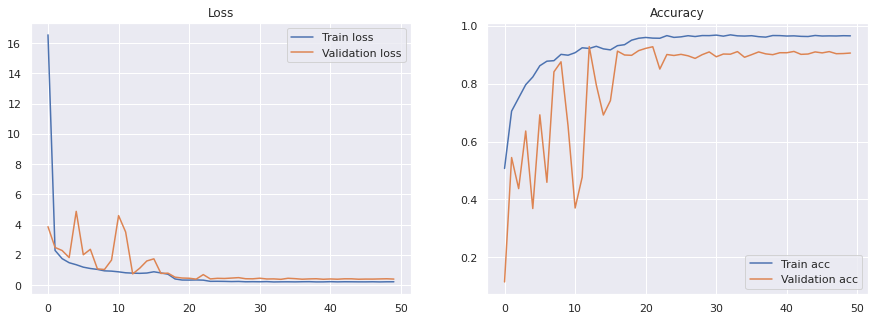

In [31]:
#Show learning curve
show_final_history(model_fit) 

In [32]:
#Prepare test dataset
test_datagen   = ImageDataGenerator()
test_dataset = test_datagen.flow_from_directory(
    '/content/PBC_dataset_normal_DIB_pre/test',
    seed=777,
    target_size=(128, 128),
    batch_size=64,
    class_mode = 'categorical')

Found 2572 images belonging to 8 classes.


In [33]:
#Evaluate validation and test data on trained model
valid_loss, valid_accuracy = model.evaluate(val_dataset)
test_loss, test_accuracy   = model.evaluate(test_dataset)

41/41 [==============================] - 5s 125ms/step - loss: 0.4252 - accuracy: 0.9047


In [34]:
print('Validation Accuracy: ', round((valid_accuracy * 100), 1), "%")
print('Test Accuracy: ', round((test_accuracy * 100), 1), "%")
print(" ")
print('Validation Loss: ', round(valid_loss, 1))
print('Test Loss: ', round(test_loss, 1))

Validation Accuracy:  90.4 %
Test Accuracy:  90.5 %
 
Validation Loss:  0.4
Test Loss:  0.4


In [35]:
test_steps = test_dataset.n // test_dataset.batch_size
print(test_steps)

40


In [36]:
test_dataset.reset()
X_test_, y_test_true = [],[] 
for i in range(test_steps):
    X , y = next(test_dataset)
    X_test_.extend(X) 
    y_test_true.extend(y)

In [37]:
#Create arrays
X_test_    = np.array(X_test_)
y_test_true= np.array(y_test_true)
print(X_test_.shape, y_test_true.shape)

(2560, 128, 128, 3) (2560, 8)


In [38]:
#Predict test data using trained model
y_pred = model.predict(X_test_)


In [39]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

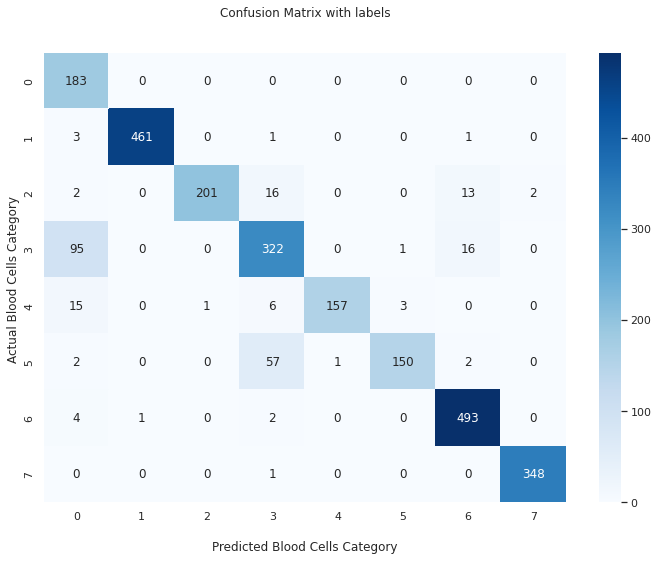

In [40]:
#Confusion matrix 
confusionMatrix = confusion_matrix(np.argmax(y_test_true, axis=1), np.argmax(y_pred, axis=1))

ax = sns.heatmap(confusionMatrix, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Blood Cells Category')
ax.set_ylabel('Actual Blood Cells Category ');

# ax.xaxis.set_ticklabels(classes)
# ax.yaxis.set_ticklabels(classes)

## Display the visualization of the Confusion Matrix.
plt.show()

In [41]:
#Print classification report for test data
print(classification_report(np.argmax(y_test_true, axis=1), np.argmax(y_pred, axis=1),zero_division=0))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       183
           1       1.00      0.99      0.99       466
           2       1.00      0.86      0.92       234
           3       0.80      0.74      0.77       434
           4       0.99      0.86      0.92       182
           5       0.97      0.71      0.82       212
           6       0.94      0.99      0.96       500
           7       0.99      1.00      1.00       349

    accuracy                           0.90      2560
   macro avg       0.91      0.89      0.89      2560
weighted avg       0.92      0.90      0.91      2560



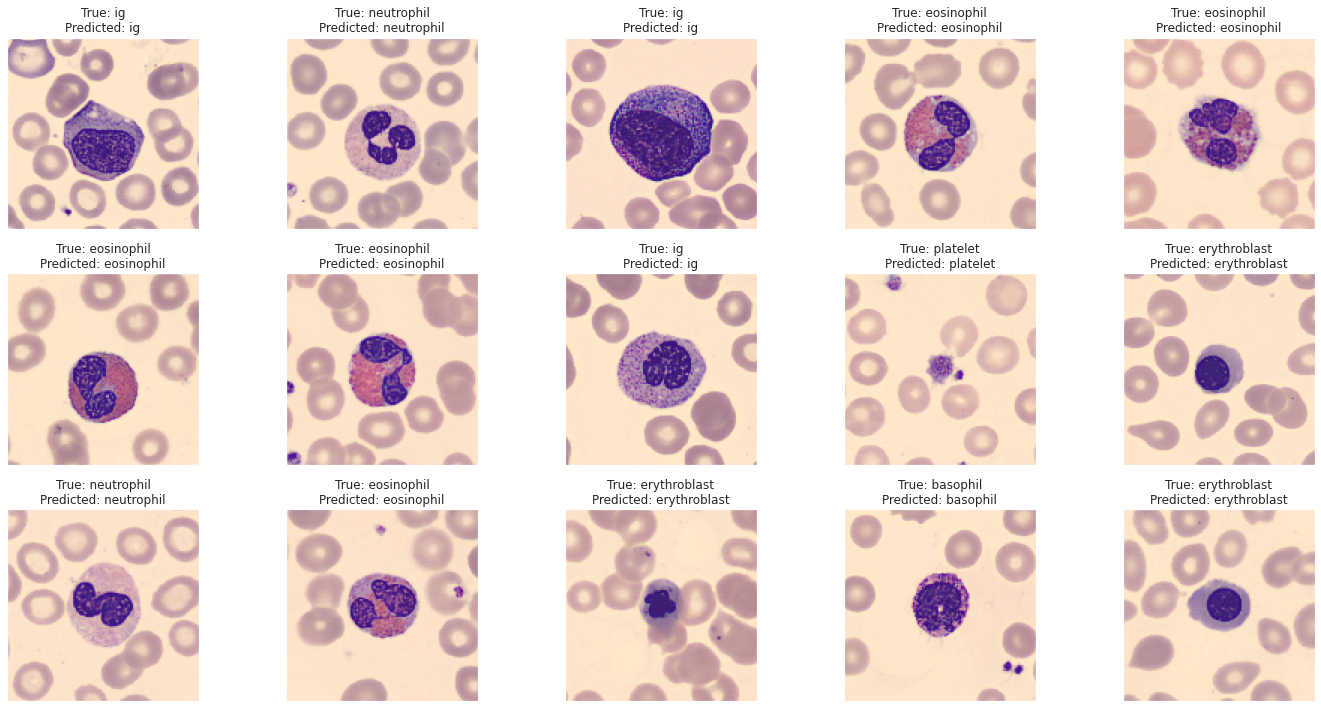

In [43]:
#Show predicted images from test data
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
  ax.imshow((X_test_[i]).astype('uint8'))
  ax.set_title(f"True: {list(test_dataset.class_indices.keys())[list(test_dataset.class_indices.values()).index(np.argmax(y_test_true, axis=1)[i])]}\nPredicted: {list(test_dataset.class_indices.keys())[list(test_dataset.class_indices.values()).index(np.argmax(y_pred, axis=1)[i])]}")
plt.tight_layout()
plt.show();